<a href="https://colab.research.google.com/github/GOPIKA-S-S/Quantum-Computing/blob/main/2348518_QC_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deutsch-Jozsa algorithm**

In [1]:
!pip install qiskit

In [2]:
!pip install pylatexenc

In [3]:
from qiskit import QuantumCircuit
import numpy as np

def dj_function(num_qubits):
    """
    Creates a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)

    # Flip output qubit with 50% chance
    if np.random.randint(0, 2):
        qc.x(num_qubits)

    # Return constant circuit with 50% chance
    if np.random.randint(0, 2):
        return qc

    # Choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        # Barriers are added to help visualize how the functions are created.
        qc.barrier()
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")
        qc.barrier()  # Indentation corrected here

    return qc

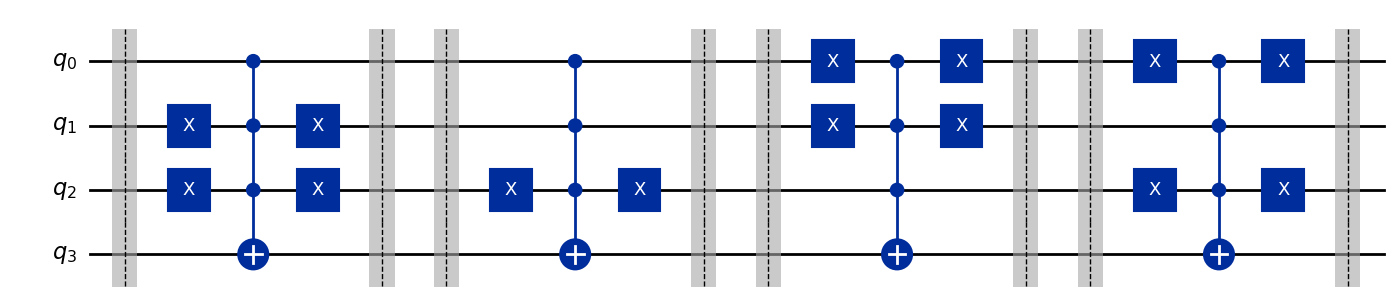

In [4]:
display(dj_function(3).draw(output='mpl'))

In [5]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.compose(function, inplace=True)
    qc.h(range(n))

    qc.measure(range(n), range(n))
    return qc

In [8]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 93.0 MB/s eta 0:00:00


In [9]:
from qiskit_aer import AerSimulator

def dj_algorithm(function: QuantumCircuit):
    """
    Determines if a Deutsch-Jozsa function is constant or balanced.
    """

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()

    if "1" in measurements[0]:
        return "balanced"
    return   "constant"

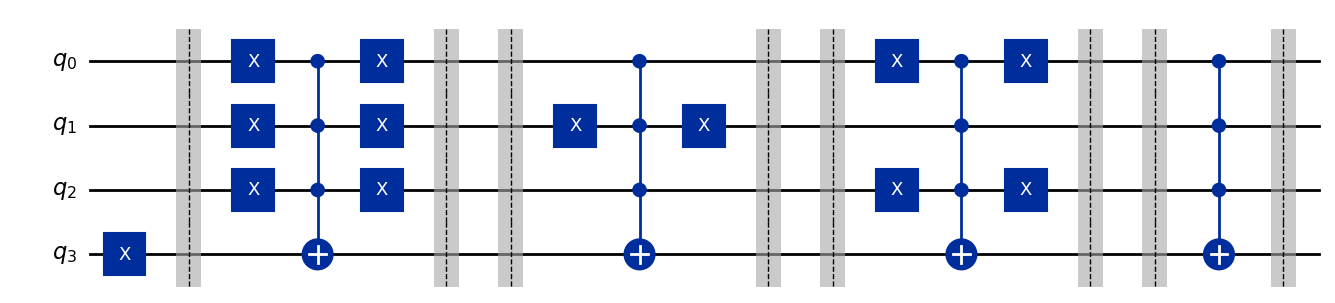

'balanced'

In [10]:
f = dj_function(3)
display(f.draw(output='mpl'))
display(dj_algorithm(f))